In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(y_true,
                          y_pred,
                          image_path=f'../../Publication/ITS_2024/Figures/confusion_matrix.jpg',
                          class_labels=('0','1','2','3','4','5','6','7','8','9')):
                          
    labels = np.unique(y_true)
    labels_translated = np.array(class_labels)
    cm = confusion_matrix(y_true, y_pred, normalize='true', labels=labels)

    df_cm_4 = pd.DataFrame(cm, columns=labels_translated, index=labels_translated)
    fig, ax = plt.subplots(dpi=110)
    sns.heatmap(df_cm_4, annot=True, fmt='.2f', linewidth=1.5)  # fmt='.1f'
    plt.show()
    print(df_cm_4)
    print('Saving confusion matrix with name: ', image_path)
    fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

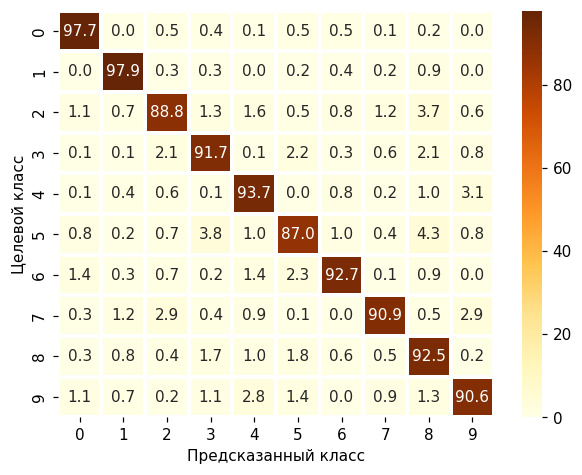

In [9]:
cm = np.load("../../bit_files_v3/experiment_results/conf_matrix_6q5.npy")
row_sums = cm.sum(axis=1)
cm_norm = cm / row_sums[:, np.newaxis] * 100

class_labels=('0','1','2','3','4','5','6','7','8','9')

df_cm_4 = pd.DataFrame(cm_norm, columns=class_labels, index=class_labels)
fig, ax = plt.subplots(dpi=110)
sns.heatmap(df_cm_4, annot=True, fmt='.1f', linewidth=1.5, cmap="YlOrBr")  # fmt='.1f'
plt.ylabel('Целевой класс')
plt.xlabel('Предсказанный класс')
plt.show()

image_name = '../../../Publication/ITS_2024/Figures/cm_6q5.jpg'
fig.savefig(image_name, format='jpg', dpi=200, bbox_inches='tight', pad_inches = 0.1)